# Web scraping for BU CS 506 

Lecture materials by Harshal Chaudhuri, March 20, 2018. 

## Apple Jobs website scraping

Apple Jobs website uses AJAX queries to load the data. You can verify this by disabling Javascript, and refreshing the website to see that it does not have the relevant data. In the following cells, we create a simple scraper that makes similar AJAX calls to the server.

In [2]:
import json
import requests
from bs4 import BeautifulSoup

from IPython.display import Image

## Check the XHR tab in the Developer Options

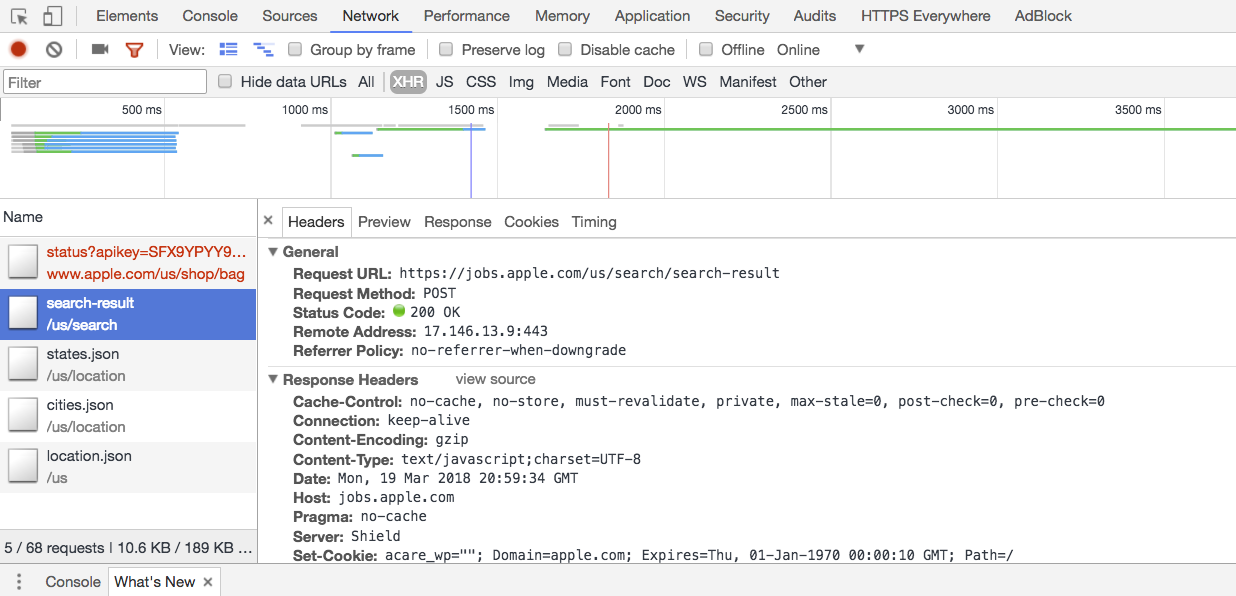

In [3]:
Image(filename='figs/apple1.png')

## Steps in scraping using XHR 

1. Build XHR request with required parameters.
2. Make the request.
3. Parse the response.

In [4]:
# Search Parameters
search_request = {
        'searchString': '',
        'jobType': 0,
        'sortBy': 'req_open_dt',
        'sortOrder': '1',
        'language': None,
        'autocomplete': None,
        'delta': 0,
        'numberOfResults': 0,
        'pageNumber': None,
        'internalExternalIndicator': 0,
        'lastRunDate': 0,
        'countryLang': None,
        'filters': {
              'locations':{
                   'location':[{
                            'type': 0,
                            'code': 'USA',
                            'countryCode': None,
                            'stateCode': None,
                            'cityCode': None,
                            'cityName': None
                            }]
                        },
                    'languageSkills': None,
                    'jobFunctions': None,
                    'retailJobSpecs': None,
                    'businessLine': None,
                    'hiringManagerId': None},
                'requisitionIds': None
        }

In [5]:
# Scraping method
def scrape_jobs(max_pages=2):
    jobs = []
    pageno = 0
    search_request['pageNumber'] = pageno

    while pageno < max_pages:
        payload = {
                    'searchRequestJson': json.dumps(search_request),
                    'clientOffset': '-300'
                    }
        r = requests.post(
                url = 'https://jobs.apple.com/us/search/search-result',
                data = payload,
                headers = {
                    'X-Requested-With': 'XMLHttpRequest'
                    }
                )

        # BeautifulSoup parser
        s = BeautifulSoup(r.text, 'lxml')
        if not s.requisition:
            break

        for r in s.findAll('requisition'):
            job = {}
            job['jobid'] = r.jobid.text
            job['title'] = r.postingtitle and \
                    r.postingtitle.text or r.retailpostingtitle.text
            job['location'] = r.location.text
            jobs.append(job)

        pageno += 1
        search_request['pageNumber'] = pageno

    return jobs

def scrape_apple_jobs():
    jobs = scrape_jobs()
    for job in jobs:
        print (job)

In [6]:
scrape_apple_jobs()

{'jobid': 'USABS', 'title': 'US-Business Expert', 'location': 'Various'}
{'jobid': 'USACR', 'title': 'US-Creative', 'location': 'Various'}
{'jobid': 'USAEX', 'title': 'US-Expert', 'location': 'Various'}
{'jobid': 'USAGN', 'title': 'US-Genius', 'location': 'Various'}
{'jobid': 'USAIS', 'title': 'US-Operations Expert', 'location': 'Various'}
{'jobid': 'USALP', 'title': 'US-Apple Store Leader Program', 'location': 'Various'}
{'jobid': 'USAML', 'title': 'US-Market Leader', 'location': 'Various'}
{'jobid': 'USAMN', 'title': 'US-Manager', 'location': 'Various'}
{'jobid': 'USASE', 'title': 'US-Solution Engineer', 'location': 'Various'}
{'jobid': 'USASL', 'title': 'US-Store Leader', 'location': 'Various'}
{'jobid': 'USASP', 'title': 'US-Specialist', 'location': 'Various'}
{'jobid': 'USSS', 'title': 'US-Technical Specialist', 'location': 'Various'}
{'jobid': 'USSM', 'title': 'US-Senior Manager', 'location': 'Various'}
{'jobid': '83716768', 'title': 'Software Engineer, WiFi Frameworks', 'locatio

# YouTube video list scraping using browser automation

1. Download and unzip Chromedriver: https://sites.google.com/a/chromium.org/chromedriver/home
2. Add the path to Chromedriver as an argument when the webdriver is instantiated

In [7]:
from selenium import webdriver
from time import sleep


In [8]:
# The path should lead to your copy of chromedriver
driver = webdriver.Chrome('/Users/asmith/repositories/github/BU-CS506-Spring2018/chromedriver')
 

# YouTube search URL
url = "https://www.youtube.com/results?q=formula+1"

# Open the page in Selenium driver instance
driver.get(url)

## Use XPath to select the relevant elements in the webpage

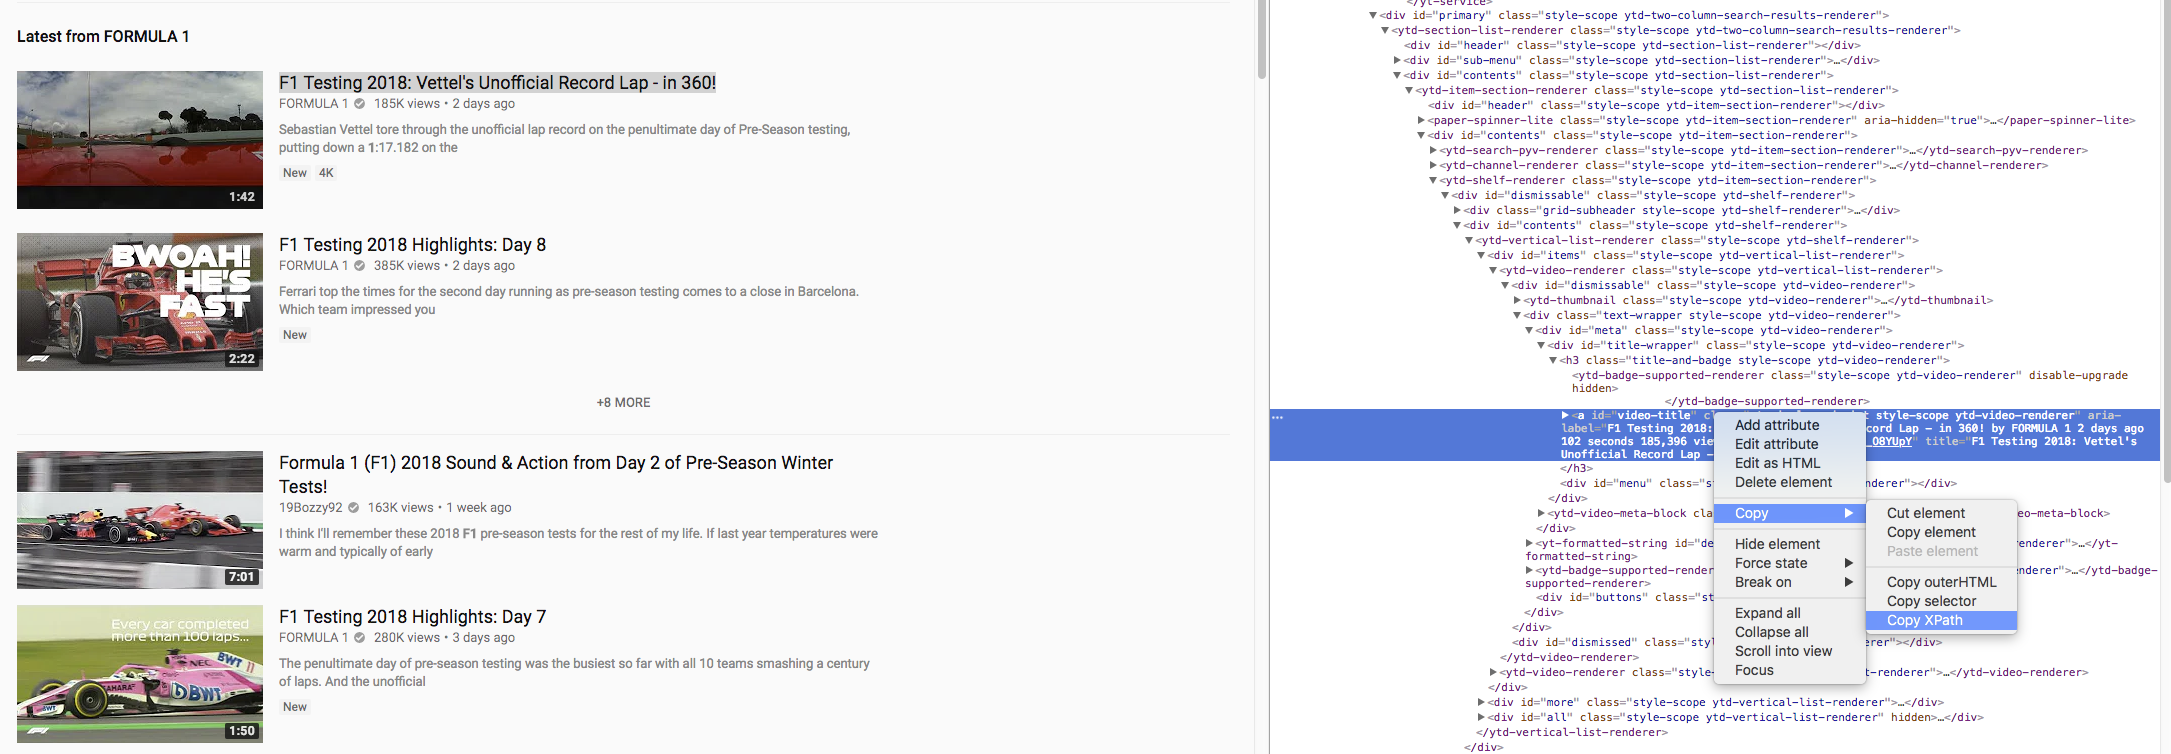

In [10]:
Image(filename="figs/youtube2.png")

In [12]:
def get_youtube_videos(driver):
    # Use XPath to get all HTML elements corresponding to videos
    videos = driver.find_elements_by_xpath("""//*[@id="video-title"]""")
    
    # Get video attributes
    for video in videos:
        title = video.get_attribute('title')
        href = video.get_attribute('href')
        
        print (title)
        print (href)
        print ("-----")

In [13]:
get_youtube_videos(driver)

Five Of The Best Onboards Down Under | Australian Grand Prix
https://www.youtube.com/watch?v=0ZlNEGhS13I
-----
The Shortest Race In History | 1991 Australian Grand Prix
https://www.youtube.com/watch?v=4Ps29eT1_rs
-----
Hamilton, Bottas & Wolff: Mercedes on their 2018 title defence
https://www.youtube.com/watch?v=8wkBFMw63vI
-----
F1 Season Launch 2018: Engineered Insanity
https://www.youtube.com/watch?v=vtqq_KbfUx0
-----
Formula 1 Australian Grand Prix
https://www.youtube.com/watch?v=52pZxkIzq9Y
-----
2017 "F1" Formula 1 vs Formula E Drag Race! Forza 7
https://www.youtube.com/watch?v=pbbXzZ7sTSU
-----
F1 2018 Season: Who is in the best shape?
https://www.youtube.com/watch?v=ben3Yg9M72w
-----
Lego Formula 1
https://www.youtube.com/watch?v=EuKignBh4OU
-----
Ferrari Formula 1 Corse Clienti - EPIC Line up! V8/V10/V12
https://www.youtube.com/watch?v=wtKD8zcGLsU
-----
MY FORMULA ONE TRAINING REGIME
https://www.youtube.com/watch?v=g-KYASQKdSU
-----
2014 FORMULA 1 RUSSIAN GRAND PRIX - Race Hig

## You can interact with the webpage from your code

The above list contains only 8 videos, how do you scroll down the page and use dynamic loading?

In [14]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

actions = ActionChains(driver)

Use PAGE DOWN key to scroll down so that more videos load
### Note: Browser takes some time to load the webpage, so you need to account for that.

Use sleep( ) function to allow for the webpage to load

In [15]:
for _ in range(5):
    actions.send_keys(Keys.PAGE_DOWN).perform()
    sleep(5)

In [16]:
get_youtube_videos(driver)

Five Of The Best Onboards Down Under | Australian Grand Prix
https://www.youtube.com/watch?v=0ZlNEGhS13I
-----
The Shortest Race In History | 1991 Australian Grand Prix
https://www.youtube.com/watch?v=4Ps29eT1_rs
-----
Hamilton, Bottas & Wolff: Mercedes on their 2018 title defence
https://www.youtube.com/watch?v=8wkBFMw63vI
-----
F1 Season Launch 2018: Engineered Insanity
https://www.youtube.com/watch?v=vtqq_KbfUx0
-----
Formula 1 Australian Grand Prix
https://www.youtube.com/watch?v=52pZxkIzq9Y
-----
2017 "F1" Formula 1 vs Formula E Drag Race! Forza 7
https://www.youtube.com/watch?v=pbbXzZ7sTSU
-----
F1 2018 Season: Who is in the best shape?
https://www.youtube.com/watch?v=ben3Yg9M72w
-----
Lego Formula 1
https://www.youtube.com/watch?v=EuKignBh4OU
-----
Ferrari Formula 1 Corse Clienti - EPIC Line up! V8/V10/V12
https://www.youtube.com/watch?v=wtKD8zcGLsU
-----
MY FORMULA ONE TRAINING REGIME
https://www.youtube.com/watch?v=g-KYASQKdSU
-----
2014 FORMULA 1 RUSSIAN GRAND PRIX - Race Hig

## Selenium Documentation

Documentation containing information about all the functionality of Selenium is available at https://selenium-python.readthedocs.io/

# Ethics and Netiquette in Web Scraping
 
The norms around appropriate behavior when collecting information from websites are still emerging, but a general principle is to follow a website's terms of use and, in particular, to follow the restrictions in the _robots.txt_ file present on almost every website. For example, http://airbnb.com/robots.txt explicitly lists subdomains that are disallowed for automatic retrieval, and others (like the sitemap, as of March 20, 2018) that are fine. 
 
For some interesting discussions on the academic and journalistic ethics of scraping, see: 
 
https://www.mailman.columbia.edu/research/population-health-methods/web-scraping


https://gijn.org/2015/08/12/on-the-ethics-of-web-scraping-and-data-journalism/

https://sites.stanford.edu/jumpstart-itunconf2015/ethics-legality-and-security-concerns-web-scrapingdata-collection-research 

(This last site consists just of notes from a discussion at a workshop, but it is fairly intelligible.)
